In [1]:
# Jupyter Notebook 안에서 플롯을 확인하기 위해 %matplotlib 매직 함수를 사용
%matplotlib inline

# Google API 관련
import gspread # google spread sheet
import json # json. google credential 읽기 용
from oauth2client.client import SignedJwtAssertionCredentials # 구글 인증용

# 인증. 구글 드라이브 API 활성 필요. 2주차에서 설명.
# https://docs.google.com/document/d/1z3jfxIVGEBb5w8UQarhG7av0sqVnEPixqtPM1GHSsXM

SCOPE = ['https://spreadsheets.google.com/feeds']

# JSON 포맷의 파일을 읽어서 json_key 변수에 저장. json_key는 파이썬의 사전형 변수. 
# google-apis-ec0942a60f67.json가 아닌 본인의 인증 파일 이름(전체 경로)를 사용.
json_key = json.load(open('happy035-e6c398ae9c92.json'))

# json_key의 client_email값과 private_key값을 이용해 인증을 위한 credential 생성
credentials = SignedJwtAssertionCredentials(json_key['client_email'],
                                           bytes(json_key['private_key'], 'utf-8'), SCOPE)



# 구글 스프레드 시트 연결
gs = gspread.authorize(credentials)


# 직접 설문을 만들지 않고 함께 제공된 students.csv 파일을 
# 구글 드라이브에 올려서 gspread 모듈을 통해 테스트하는 것도 가능함.

# 또는 pd.read_csv() 함수를 이용해도 됨.
# 아래에서 다시 설명.
wks = gs.open('student').sheet1

# 잘 읽어 오는지 테스트. wks.get_all_records()를 호출하여 설문 결과를 불러오고
# len()함수를 이용해서 전체 항목의 크기를 확인함.
len(wks.get_all_records())

23

In [2]:
# pandas
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')
rcParams['font.family'] = 'NanumGothicOTF'
rcParams['font.size'] = 12

import pandas as pd

# 직접 드라이브에 연결하지 않고 함께 제공된 students.csv 파일을 이용할 경우
# ex.
#df = pd.DataFrame(pd.read_csv('students.csv'))

# wks.get_all_records()의 결과를 이용해서 DataFrame 생성
df = pd.DataFrame(wks.get_all_records())

### 컬럼 이름 변경을 위한 사전
column_names = {
    'CS 지식' : 'CS',
    'R 경험' : 'R', 
    'Timestamp' : 'Timestamp', 
    '게임/오락': 'Game', 
    '금융/경제': 'Fin', 
    '기타 프로그래밍 언어' : 'ETC', 
    '나이' : 'Age',
    '스포츠': 'Sports', 
    '예술' : 'Art', 
    '이름' : 'Name', 
    '자바' : 'Java', 
    '자바스크립트': 'JS', 
    '정치/사회' : 'Pol', 
    '통계학 지식' : 'Stat',
    '파이썬을 어느정도 알고 계신가요?':'Python',
    '하고 싶은 말':'Comment'
}

### 컬럼 이름 변경
df.rename(columns=column_names, inplace=True)
df

,,Art,CS,ETC,Fin,Game,JS,Java,Pol,Python,R,Sports,Stat
0,0,4,3,1,1,1,1,2,1,2,2,4,2
1,1,3,4,4,2,1,2,4,3,2,1,1,2
2,2,3,3,3,3,2,3,2,2,2,1,3,2
3,3,4,1,1,4,4,1,1,5,1,2,2,3
4,4,2,3,1,2,5,1,3,2,1,3,2,4
5,5,4,3,3,1,1,1,2,4,3,2,1,1
6,6,3,5,5,4,3,3,2,3,5,1,3,3
7,7,1,3,3,1,1,3,2,2,2,1,1,1
8,8,2,4,4,2,5,3,2,2,3,2,2,3
9,9,2,2,3,2,5,2,1,2,2,1,1,1


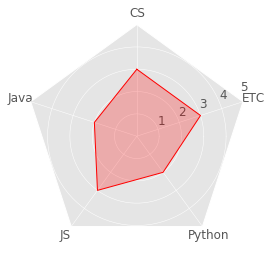

In [6]:
# Name 컬럼이 '김영근'인 row를 선택
#person = df[df['Name'] == '김영근'].iloc[0]

# 개인정보 보호를 위해 수강생들의 이름은 비공개
# 다른 데이터를 보고 싶으면 DataFrame의 ix 프로퍼티를 이용해서 인덱스 번호로 선택
person = df.ix[7] # 첫번째 row

skills = ['CS', 'Java', 'JS', 'Python', 'ETC']

import matplotlib.pyplot as plt
# radar 차트(스파이더 차트)를 그리기 위해
# 함께 제공된 utils/radar.py 파일에서 radar_graph 함수를 불러옴
from utils.radar import radar_graph

# radar_graph()의 인자는 순서대로, label, value, max_value
# [5] * len(skills)는 skills의 길이만큼 5가 담긴 리스트를 생성
# len(skills)는 5이므로 결과적으로 [5, 5, 5, 5, 5] 리스트가 생성됨
radar_graph(skills, person[skills].values, [5]*len(skills))

In [14]:
# 관심 언어
# 이름을 인자로 받아서 DataFrame의 row를 선택하지만,
# csv 파일에는 이름이 지워져 있으므로, DataFrame의 인덱스로 row를 선택하기 위해서는
# person = df[df['Name'] == name].iloc[0] 부분을
# person = df.ix[idx] 형태로 바꿔야 함.
# ex.
def radar_lang_idx(idx):
    labels = ['Python', 'R', 'Java', 'JS']
    person = df.ix[idx]
    radar_graph(labels, person[labels].values, [5]*len(labels))

def radar_interest_idx(idx):   
    labels = ['Art', 'Pol', 'Sports', 'Fin', 'Game']
    person = df.ix[idx]
    radar_graph(labels, person[labels].values, [5]*len(labels))


# radar_lang(3)
 
def radar_lang_name(name):   
    labels = ['Python', 'R', 'Java', 'JS']
    person = df[df['Name'] == name].iloc[0]
    radar_graph(labels, person[labels].values, [5]*len(labels))
    
# 관심 분야
def radar_interest_name(name):   
    labels = ['Art', 'Pol', 'Sports', 'Fin', 'Game']
    person = df[df['Name'] == name].iloc[0]
    radar_graph(labels, person[labels].values, [5]*len(labels))
    
def radar_all(idx):
    radar_interest_idx(idx)
    radar_lang_idx(idx)
    
#radar_interest('김영근')

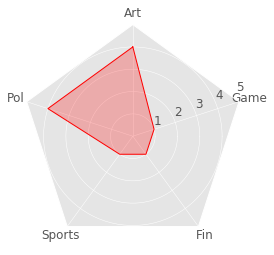

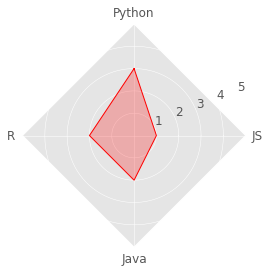

In [15]:
radar_all(5)

In [18]:
df = pd.DataFrame(pd.read_csv('student.csv', index_col=0))
df

,CS,R,Game,Fin,ETC,Sports,Art,Java,JS,Pol,Stat,Python
0,3,2,1,1,1,4,4,2,1,1,2,2
1,4,1,1,2,4,1,3,4,2,3,2,2
2,3,1,2,3,3,3,3,2,3,2,2,2
3,1,2,4,4,1,2,4,1,1,5,3,1
4,3,3,5,2,1,2,2,3,1,2,4,1
5,3,2,1,1,3,1,4,2,1,4,1,3
6,5,1,3,4,5,3,3,2,3,3,3,5
7,3,1,1,1,3,1,1,2,3,2,1,2
8,4,2,5,2,4,2,2,2,3,2,3,3
9,2,1,5,2,3,1,2,1,2,2,1,2


In [19]:
df.describe()

,CS,R,Game,Fin,ETC,Sports,Art,Java,JS,Pol,Stat,Python
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2.869565,1.913043,2.782609,2.521739,2.521739,2.347826,2.956522,1.913043,1.782609,2.826087,2.260870,2.304348
std,1.254242,0.996040,1.622471,1.122884,1.343996,1.191206,1.106931,0.900154,0.951388,1.154130,1.136877,1.145536
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.500000
50%,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,2.000000
75%,3.500000,2.500000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.500000,4.000000,3.000000,3.000000
max,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000


In [23]:
df['Python'].mean()

2.3043478260869565

In [24]:
df['R'].mean()

1.9130434782608696

In [25]:
df['CS'].mean()

2.869565217391304